In [1]:
import pandas as pd
import numpy as np 

In [2]:
data = pd.read_csv('Data_Project4_Lyrics')

In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
data

,Lyrics,Artist
0,Son you know why you the greatest alive Why...,Eminem
1,Nigga I wear fur coats in the summer nigga ...,Eminem
2,Yeah I was born a misfit grew up ten miles f...,Eminem
3,Yeah huh (hip hop hip hop hip hop) Turn the ...,Eminem
4,You will not be able to stay home brotha You ...,Eminem
...,...,...
995,Baby slow down just here me out There s some...,Rihanna
996,Oh oh oh oh oh oh Oh oh oh oh yeah Lis...,Rihanna
997,Boy let me let me Why don t you let me let m...,Rihanna
998,The galdem rush to feel the ill touch Galdem b...,Rihanna


* Clean the text

In [115]:
data["Lyrics"] = data["Lyrics"].replace(r'[a-z][0-9]', '', regex=True)
data["Lyrics"] = data["Lyrics"].replace(r'[(0-9)]', '', regex=True)
data["Lyrics"] = data["Lyrics"].replace(r'[{0-9}]', '', regex=True)

In [141]:
data['Lyrics'][651]

'Oh yeah  yeah  yeah  Oh yeah  yeah  yeah  Yeah  look    I don t know how to talk to you  I don t know how to ask you if you re okay  My friends always feel the need to tell me things  Seems like they re just happier than us these days  Yeah  these days I don t know how to talk to you  I don t know how to be there when you need me  It feels like the only time you see me  Is when you turn your head to the side and look at me differently    Yeah  and last night I think I lost my patience  Last night I got high as the expectations  Last night  I came to a realization  And I hope you can take it  I hope you can take it    I m too good to you  I m way too good to you  You take my love for granted  I just don t understand it  No  I m too good to you  I m way too good to you  You take my love for granted  I just don t understand it    I don t know how to talk to you  I just know I found myself getting lost with you  Lately you just make me work too hard for you  Got me on flights overseas  an

In [9]:
import nltk

In [10]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer

In [11]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer   

STOPWORDS = stopwords.words('english')

print(STOPWORDS)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
vectorizer = TfidfVectorizer(stop_words=STOPWORDS , ngram_range=(1,2)) # instanciation

X= vectorizer.fit_transform(data['Lyrics'].values.astype('str'))#fit bag of words model on our corpus


# for us to see the vectorized labeled data
pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names(), index=data['Artist'])

C:\Users\nadim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,00 whassup,02,02 burn,03,03 went,10,10 gotta,10 like,10 million,...,zoo come,zoo everybody,zoom,zoom headed,zy,zy latex,zzt,zzt 2001,zzzt,zzzt zzt
Artist,,,,,,,,,,,,,,,,,,,,,
Eminem,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Eminem,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Eminem,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Eminem,0.0,0.0,0.0,0.0,0.0,0.0,0.017492,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Eminem,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rihanna,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rihanna,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rihanna,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#vectorizer.vocabulary_

In [14]:
from sklearn.model_selection import train_test_split 
X = X.toarray()
y = data['Artist']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

* Use naive_bayes algorithm 

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
model = MultinomialNB()

In [17]:
model.fit(X_train,y_train)

MultinomialNB()

In [18]:
model.score(X_train,y_train)

0.985

In [19]:
model.score(X_test,y_test)

0.945

In [20]:
model.classes_

array(['Eminem', 'Rihanna'], dtype='<U7')

In [21]:
def Artist_Name(word):
    return model.predict(vectorizer.transform([word]))

In [22]:
Artist_Name('ohhh ohhh')

array(['Rihanna'], dtype='<U7')

In [23]:
model.predict_proba(vectorizer.transform(["ohh ohhh"]))

array([[0.38997606, 0.61002394]])

In [24]:
model.predict_proba(vectorizer.transform(["kids"]))

array([[0.67619711, 0.32380289]])

In [25]:
model.predict_proba(vectorizer.transform(["ten cents are two  Skim through the music to give shit reviews  To get clicks  but bitch  you just lit the fuse  Don t get misconstrued  business as us   Shit list renewed so get shit to do  Or ge"]))

array([[0.6500563, 0.3499437]])

In [26]:
model.predict_proba(vectorizer.transform([" oh  oh  you  oh  oh  You  oh  oh  you"]))

array([[0.27540017, 0.72459983]])

In [27]:
predictions =model.predict(X_test)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Eminem       0.92      0.97      0.95        99
     Rihanna       0.97      0.92      0.94       101

    accuracy                           0.94       200
   macro avg       0.95      0.95      0.94       200
weighted avg       0.95      0.94      0.94       200



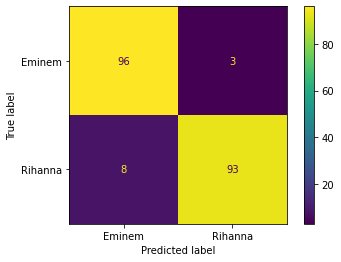

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, predictions, normalize=None)